# UNIT TEST - Data processed for 52 weeks for all the stations in ALABAMA for the year 2003

Pgeocode:https://pythonlang.dev/repo/symerio-pgeocode/ 

In [1]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


### IMPORTING ALL THE REQUIRED MODULES

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import chain
import pandas as pd
import datetime
import time
import os
import geopy.distance
from math import dist
import sklearn.neighbors

### USEFUL FUNCTION FOR PROCESSING DATA

In [2]:
def list_slicer (l:list,c1:int,c2:int):
    # slice a non-numpy 2d list from column 1 (c1) to column 2 (c2)
    # return a 2d sublist
    result = []
    for row in l:
        result.append(row[c1:c2])
    return result


In [3]:
def getDateRangeFromWeek(p_year,p_week):
    '''
    # get week start & end date
    # in YYYYMMDD format
    '''
    start = datetime.datetime.strptime(f'{p_year}-W{int(p_week )- 1}-1', "%Y-W%W-%w").date()
    f = start + datetime.timedelta(days=1) # otherwise first day of wk1 is last day of Dec
    l = f + datetime.timedelta(days=6.9)
    firstday = 10000*f.year+100*f.month + f.day
    lastday = 10000*l.year+100*l.month + l.day
    return firstday, lastday

#Call function to get dates range 
firstdate, lastdate =  getDateRangeFromWeek('2013','1')
print('print function ',firstdate,' ', lastdate)

print function  20130101   20130107


## Station query - Getting all the station of ALABAMA

In [4]:
# convert station list to array
# there should be better ways but I didn't find any...
rows, cols = (119503, 9)
stations= [[0 for i in range(cols)] for j in range(rows)]
with open('ghcnd-stations.txt','r') as f:
    s = f.readlines()
i = 0
for station in s:
    stations[i][0]=station[:11] #ID
    stations[i][1]=float(station[12:20]) # Latitude
    stations[i][2]=float(station[21:30]) # Lontitude
    stations[i][3]=float(station[31:37]) # Elevation
    stations[i][4]=station[38:40].strip() # State
    stations[i][5]=station[41:71].strip() # Name
    stations[i][6]=station[72:75].strip() # GSN flag
    stations[i][7]=station[76:79].strip() # HCN/CRN flag
    WMO = station[80:85].strip()
    if len(WMO)>0:
        stations[i][8]=int(WMO) # WMO ID
    else:
        stations[i][8]=""
    i +=1


In [5]:
# find all stations in a state
state = "AL"
state_all=[]
station_id_in_state=[]
for row in stations:
    if row[4] == state:
        state_all.append(row)
        station_id_in_state.append(row[0])
        x = 0
#for r in state_all:
#    print(r)

In [6]:
print(station_id_in_state)

['US1ALAT0002', 'US1ALAT0010', 'US1ALAT0013', 'US1ALAT0014', 'US1ALBB0003', 'US1ALBB0004', 'US1ALBB0005', 'US1ALBB0006', 'US1ALBB0008', 'US1ALBL0002', 'US1ALBL0003', 'US1ALBL0005', 'US1ALBL0006', 'US1ALBL0007', 'US1ALBL0008', 'US1ALBL0009', 'US1ALBL0011', 'US1ALBL0013', 'US1ALBL0015', 'US1ALBL0016', 'US1ALBL0018', 'US1ALBL0020', 'US1ALBL0021', 'US1ALBL0023', 'US1ALBR0001', 'US1ALBR0002', 'US1ALBR0003', 'US1ALBR0006', 'US1ALBT0001', 'US1ALBT0002', 'US1ALBW0001', 'US1ALBW0003', 'US1ALBW0004', 'US1ALBW0005', 'US1ALBW0008', 'US1ALBW0009', 'US1ALBW0011', 'US1ALBW0013', 'US1ALBW0015', 'US1ALBW0017', 'US1ALBW0019', 'US1ALBW0020', 'US1ALBW0023', 'US1ALBW0026', 'US1ALBW0027', 'US1ALBW0028', 'US1ALBW0030', 'US1ALBW0031', 'US1ALBW0032', 'US1ALBW0033', 'US1ALBW0035', 'US1ALBW0036', 'US1ALBW0038', 'US1ALBW0039', 'US1ALBW0040', 'US1ALBW0041', 'US1ALBW0042', 'US1ALBW0043', 'US1ALBW0045', 'US1ALBW0049', 'US1ALBW0052', 'US1ALBW0053', 'US1ALBW0054', 'US1ALBW0057', 'US1ALBW0058', 'US1ALBW0059', 'US1ALBW0

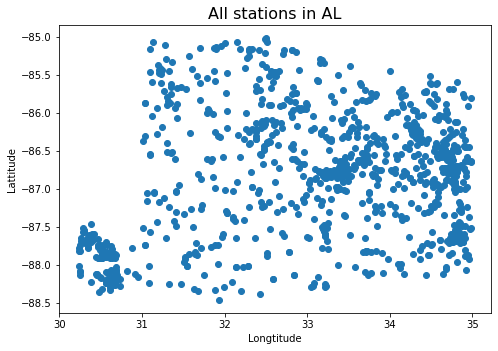

In [7]:
# plot all result stations

x = [i for v in list_slicer(state_all,1,2) for i in v] # all x coordinates
y = [i for v in list_slicer(state_all,2,3) for i in v] # all y coordinates
fig=plt.figure(0)
ax = fig.add_axes([0,0,1,1])
ax.scatter(x,y)
ax.set_ylabel("Lattitude")
ax.set_xlabel("Longtitude")
ax.set_title('All stations in ' +str(state), fontsize=16)
plt.show()


## Process .csv files in /by_year folder

In [8]:
# open a station file
import os
year = 2003
filename = os.path.join("by_year", str(year) + ".csv")
colnames = ['ID','date','elem','value','M-flag','Q-flag','S-Flag','ObsTime']
df = pd.read_csv(filename,names=colnames, header=None)
# df['Date'] = pd.to_datetime(df['YYYYMMDD'].astype(str), format='%Y%m%d')
#display(df.loc[50:60])
df

,ID,date,elem,value,M-flag,Q-flag,S-Flag,ObsTime
0,AE000041196,20030101,TMIN,118,NaN,NaN,I,NaN
1,AE000041196,20030101,TAVG,161,H,NaN,S,NaN
2,AEM00041194,20030101,TMIN,126,NaN,NaN,S,NaN
3,AEM00041194,20030101,TAVG,175,H,NaN,S,NaN
4,AEM00041217,20030101,TMAX,238,NaN,NaN,S,NaN
...,...,...,...,...,...,...,...,...
36573752,ZI000067775,20031231,TMAX,312,NaN,NaN,I,NaN
36573753,ZI000067775,20031231,TMIN,158,NaN,NaN,I,NaN
36573754,ZI000067775,20031231,TAVG,248,H,NaN,S,NaN
36573755,ZI000067975,20031231,TMIN,190,NaN,NaN,S,NaN


In [9]:
df2 = df.iloc[:,:4] # remove the flags and obstimes
df2

,ID,date,elem,value
0,AE000041196,20030101,TMIN,118
1,AE000041196,20030101,TAVG,161
2,AEM00041194,20030101,TMIN,126
3,AEM00041194,20030101,TAVG,175
4,AEM00041217,20030101,TMAX,238
...,...,...,...,...
36573752,ZI000067775,20031231,TMAX,312
36573753,ZI000067775,20031231,TMIN,158
36573754,ZI000067775,20031231,TAVG,248
36573755,ZI000067975,20031231,TMIN,190


In [10]:
df2['Station_ID'] = range(1, len(df2) + 1)
df2.head()

,ID,date,elem,value,Station_ID
0,AE000041196,20030101,TMIN,118,1
1,AE000041196,20030101,TAVG,161,2
2,AEM00041194,20030101,TMIN,126,3
3,AEM00041194,20030101,TAVG,175,4
4,AEM00041217,20030101,TMAX,238,5


In [11]:
df2 = df2[["ID","elem","date","value","Station_ID"]] # Reduce comlumns
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d') # convert date format
df2

,ID,elem,date,value,Station_ID
0,AE000041196,TMIN,2003-01-01,118,1
1,AE000041196,TAVG,2003-01-01,161,2
2,AEM00041194,TMIN,2003-01-01,126,3
3,AEM00041194,TAVG,2003-01-01,175,4
4,AEM00041217,TMAX,2003-01-01,238,5
...,...,...,...,...,...
36573752,ZI000067775,TMAX,2003-12-31,312,36573753
36573753,ZI000067775,TMIN,2003-12-31,158,36573754
36573754,ZI000067775,TAVG,2003-12-31,248,36573755
36573755,ZI000067975,TMIN,2003-12-31,190,36573756


In [12]:
df2['day_of_year'] = df2['date'].dt.dayofyear
df2

,ID,elem,date,value,Station_ID,day_of_year
0,AE000041196,TMIN,2003-01-01,118,1,1
1,AE000041196,TAVG,2003-01-01,161,2,1
2,AEM00041194,TMIN,2003-01-01,126,3,1
3,AEM00041194,TAVG,2003-01-01,175,4,1
4,AEM00041217,TMAX,2003-01-01,238,5,1
...,...,...,...,...,...,...
36573752,ZI000067775,TMAX,2003-12-31,312,36573753,365
36573753,ZI000067775,TMIN,2003-12-31,158,36573754,365
36573754,ZI000067775,TAVG,2003-12-31,248,36573755,365
36573755,ZI000067975,TMIN,2003-12-31,190,36573756,365


In [13]:
df2['day_of_year'] = df2['date'].dt.dayofyear
print(df2.shape)
df2.head()

(36573757, 6)


,ID,elem,date,value,Station_ID,day_of_year
0,AE000041196,TMIN,2003-01-01,118,1,1
1,AE000041196,TAVG,2003-01-01,161,2,1
2,AEM00041194,TMIN,2003-01-01,126,3,1
3,AEM00041194,TAVG,2003-01-01,175,4,1
4,AEM00041217,TMAX,2003-01-01,238,5,1


In [14]:
boolean_series = df2.ID.isin(station_id_in_state)
filtered_df = df2[boolean_series]
print(filtered_df.shape)
df2 = filtered_df
df2.head()

(296549, 6)


,ID,elem,date,value,Station_ID,day_of_year
40459,USC00010008,PRCP,2003-01-01,287,40460,1
40460,USC00010008,SNOW,2003-01-01,0,40461,1
40461,USC00010063,SNOW,2003-01-01,0,40462,1
40462,USC00010063,SNWD,2003-01-01,0,40463,1
40463,USC00010140,PRCP,2003-01-01,234,40464,1


In [15]:
df2['wkk'] = (df2['day_of_year']//7)+1
df2

<ipython-input-15-e4a376b446d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wkk'] = (df2['day_of_year']//7)+1


,ID,elem,date,value,Station_ID,day_of_year,wkk
40459,USC00010008,PRCP,2003-01-01,287,40460,1,1
40460,USC00010008,SNOW,2003-01-01,0,40461,1,1
40461,USC00010063,SNOW,2003-01-01,0,40462,1,1
40462,USC00010063,SNWD,2003-01-01,0,40463,1,1
40463,USC00010140,PRCP,2003-01-01,234,40464,1,1
...,...,...,...,...,...,...,...
36571456,USW00093806,TSUN,2003-12-31,0,36571457,365,53
36571457,USW00093806,WDF2,2003-12-31,200,36571458,365,53
36571458,USW00093806,WDF5,2003-12-31,200,36571459,365,53
36571459,USW00093806,WSF2,2003-12-31,31,36571460,365,53


In [16]:
df2 = df2[["ID","elem","wkk","value"]]
df2

,ID,elem,wkk,value
40459,USC00010008,PRCP,1,287
40460,USC00010008,SNOW,1,0
40461,USC00010063,SNOW,1,0
40462,USC00010063,SNWD,1,0
40463,USC00010140,PRCP,1,234
...,...,...,...,...
36571456,USW00093806,TSUN,53,0
36571457,USW00093806,WDF2,53,200
36571458,USW00093806,WDF5,53,200
36571459,USW00093806,WSF2,53,31


In [17]:
# weekly data for all stations

df3=df2.groupby(["ID","elem","wkk"]).agg({"value":['sum']})
#df3=df2.groupby(["ID","elem","wkk"])['value'].sum()
df3

value
                       sum
ID          elem wkk      
USC00010008 PRCP 1     287
                 2       0
                 3       0
                 4      25
                 5      74
...                    ...
USW00093806 WSF5 49    612
                 50    684
                 51    708
                 52    536
                 53    112

[46097 rows x 1 columns]

In [18]:
df3.head()

value
                       sum
ID          elem wkk      
USC00010008 PRCP 1     287
                 2       0
                 3       0
                 4      25
                 5      74

In [19]:
df3 = df3.reset_index()
df3.head()
df3.size
df3 = df3[df3['elem']=='PRCP']

In [20]:
df3 = df3.iloc[:,2:]
df3.head()

,wkk,value
,,sum
0,1,287
1,2,0
2,3,0
3,4,25
4,5,74


In [21]:
print(df3.shape)

value = df3.values
print(value)

(7068, 2)
[[  1 287]
 [  2   0]
 [  3   0]
 ...
 [ 51  13]
 [ 52 255]
 [ 53   3]]


### FINDING NUMBER OF CLUSTERS AND START MODELLING

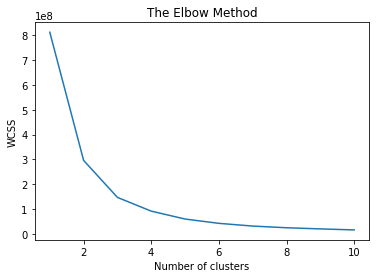

In [22]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd


#X = df.iloc[:, [3, 4]].values
X = df3.values


from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the mall dataset with 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
# The fit predict method now seggregates the data in 5 clusters based on the KMeans algo
# The one dimensional array is also called as the vector
y_kmeans = kmeans.fit_predict(X)

### REPRESENTING THE DATA USING 5 CLUSTERS

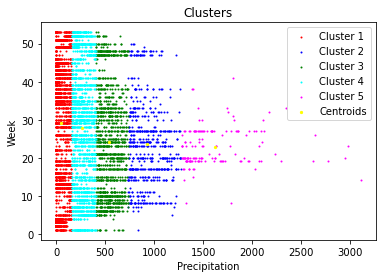

In [24]:
# Using the kmeans for the new data

Xnew = df3.values
y_kmeansnew = kmeans.fit_predict(Xnew)

# Visualising the clusters for the new data that we have trained
plt.scatter(Xnew[y_kmeansnew == 0, 1], Xnew[y_kmeansnew == 0, 0], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(Xnew[y_kmeansnew == 1, 1], Xnew[y_kmeansnew == 1, 0], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(Xnew[y_kmeansnew == 2, 1], Xnew[y_kmeansnew == 2, 0], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(Xnew[y_kmeansnew == 3, 1], Xnew[y_kmeansnew == 3, 0], s = 1, c = 'cyan', label = 'Cluster 4')
plt.scatter(Xnew[y_kmeansnew == 4, 1], Xnew[y_kmeansnew == 4, 0], s = 1, c = 'magenta', label = 'Cluster 5')
# This is for the centroid with size=150 to see it as a big one
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 5, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Precipitation')
plt.ylabel('Week')
plt.legend()
plt.show()

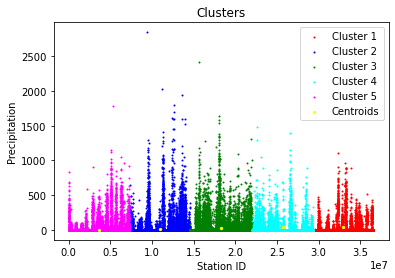

In [76]:
# Using the kmeans for the new data

Xnew = df3.values
y_kmeansnew = kmeans.fit_predict(Xnew)

# Visualising the clusters for the new data that we have trained
plt.scatter(Xnew[y_kmeansnew == 0, 1], Xnew[y_kmeansnew == 0, 2], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(Xnew[y_kmeansnew == 1, 1], Xnew[y_kmeansnew == 1, 2], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(Xnew[y_kmeansnew == 2, 1], Xnew[y_kmeansnew == 2, 2], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(Xnew[y_kmeansnew == 3, 1], Xnew[y_kmeansnew == 3, 2], s = 1, c = 'cyan', label = 'Cluster 4')
plt.scatter(Xnew[y_kmeansnew == 4, 1], Xnew[y_kmeansnew == 4, 2], s = 1, c = 'magenta', label = 'Cluster 5')
# This is for the centroid with size=150 to see it as a big one
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 5, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Station ID')
plt.ylabel('Precipitation')
plt.legend()
plt.show()